In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection

In [4]:
!pip install graphviz
import graphviz

You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
sailData = pd.read_csv('s3://rmit-ml-2020s1-lab-data/symbolic/sailing-full.tab', delim_whitespace=True)
zooData = pd.read_csv('s3://rmit-ml-2020s1-lab-data/symbolic/zoo.tab', delim_whitespace=True)
wineData = pd.read_csv('s3://rmit-ml-2020s1-lab-data/symbolic/winequality-red-class.tab', delim_whitespace=True)
bostonData = pd.read_csv('s3://rmit-ml-2020s1-lab-data/BostonHousingPrice/housing.data.csv', delimiter='\s+')
zooData = zooData.drop(columns='name')

In [6]:
sailDataTarget = sailData['Sail']
sailDataAttrs = sailData.drop(columns = 'Sail')
sailDataAttrsExpand = pd.get_dummies(sailDataAttrs)
sailDataAttrsExpand

,Outlook_rainy,Outlook_sunny,Company_big,Company_med,Company_no,Sailboat_big,Sailboat_small
0,1,0,1,0,0,1,0
1,1,0,1,0,0,0,1
2,1,0,0,1,0,1,0
3,1,0,0,1,0,0,1
4,0,1,1,0,0,1,0
5,0,1,1,0,0,0,1
6,0,1,0,1,0,1,0
7,0,1,0,1,0,1,0
8,0,1,0,1,0,0,1
9,0,1,0,0,1,0,1


In [7]:
le = preprocessing.LabelEncoder()
le.fit(sailDataTarget)
class_labels = le.inverse_transform([0, 1])
print(le.transform(sailDataTarget))
print(class_labels)

[1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0]
['no' 'yes']


In [8]:
clfSail = tree.DecisionTreeClassifier(criterion = "entropy")
clfSail = clfSail.fit(sailDataAttrsExpand, sailDataTarget)

In [9]:
predictions = clfSail.predict(sailDataAttrsExpand)
print(metrics.classification_report(sailDataTarget, predictions))

              precision    recall  f1-score   support

          no       0.79      1.00      0.88        11
         yes       1.00      0.67      0.80         9

   micro avg       0.85      0.85      0.85        20
   macro avg       0.89      0.83      0.84        20
weighted avg       0.88      0.85      0.84        20



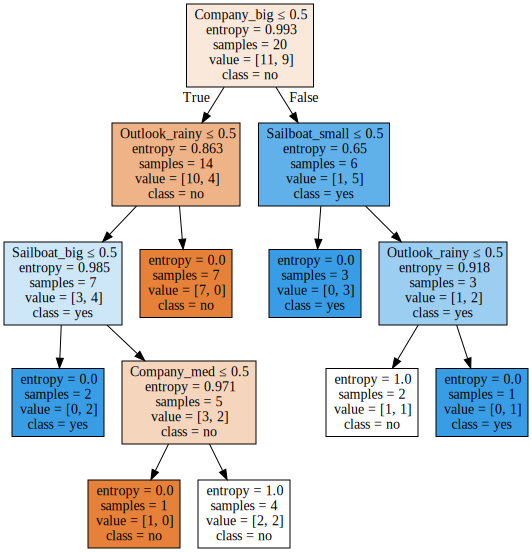

In [10]:
dot_data = tree.export_graphviz(clfSail, out_file=None,feature_names=sailDataAttrsExpand.columns,
                               class_names=class_labels,filled=True,rounded=False,special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [11]:
zooDataTarget = zooData['type']
zooDataAttrs = zooData.drop(columns = 'type')
zooDataAttrsExpand = pd.get_dummies(zooDataAttrs)

In [12]:
le = preprocessing.LabelEncoder()
le.fit(zooDataTarget)
class_labels = le.inverse_transform([0,1,2,3,4,5,6])
print(le.transform(zooDataTarget))
print(class_labels)

clfZoo = tree.DecisionTreeClassifier(criterion="entropy")
clfZoo = clfZoo.fit(zooDataAttrsExpand, zooDataTarget)
predictions = clfSail.predict(sailDataAttrsExpand)
print(metrics.classification_report(sailDataTarget, predictions))

[5 5 2 5 5 5 5 2 2 5 5 1 2 4 4 4 1 5 2 5 1 1 5 1 3 0 0 5 5 5 3 5 5 1 2 5 5
 1 2 3 3 1 3 1 5 5 4 5 5 5 5 3 0 4 5 5 1 1 1 1 2 2 6 5 5 5 5 5 5 5 5 1 4 2
 5 5 6 4 1 1 6 4 2 1 5 4 2 1 3 0 6 6 2 5 5 1 5 3 5 4 1]
['amphibian' 'bird' 'fish' 'insect' 'invertebrate' 'mammal' 'reptile']
              precision    recall  f1-score   support

          no       0.79      1.00      0.88        11
         yes       1.00      0.67      0.80         9

   micro avg       0.85      0.85      0.85        20
   macro avg       0.89      0.83      0.84        20
weighted avg       0.88      0.85      0.84        20



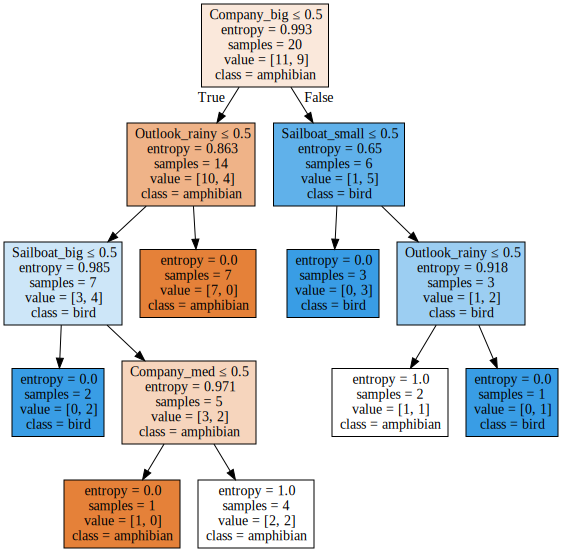

In [13]:
dot_data = tree.export_graphviz(clfSail, out_file=None,feature_names=sailDataAttrsExpand.columns,
                               class_names=class_labels,filled=True,rounded=False,special_characters=True)
graph = graphviz.Source(dot_data)
graph

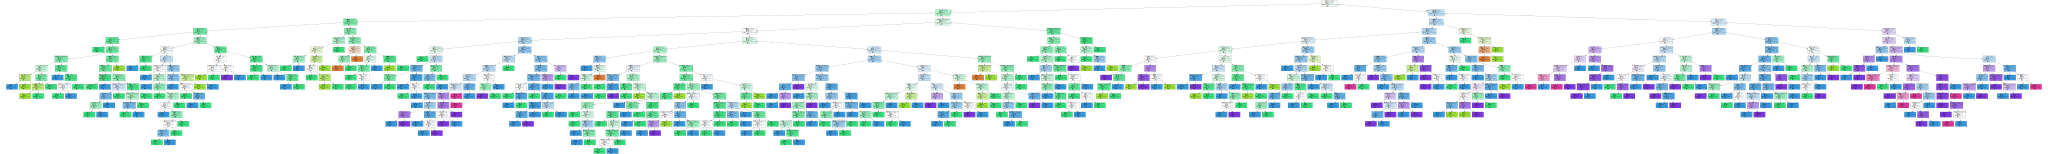

In [16]:
wineDataTarget = wineData['quality']
wineDataAttrs = wineData.drop(columns='quality')
clfWine = tree.DecisionTreeClassifier(criterion="entropy")
clfWine = clfWine.fit(wineDataAttrs, wineDataTarget)
dotDataWine = tree.export_graphviz(clfWine, out_file=None,
feature_names=wineDataAttrs.columns,
class_names=['3','4','5','6','7','8'],
filled=True,
rounded=False,
special_characters=True)
graph = graphviz.Source(dotDataWine)
graph

In [17]:
print("node count:", clfWine.tree_.node_count)

node count: 741


node count: 7


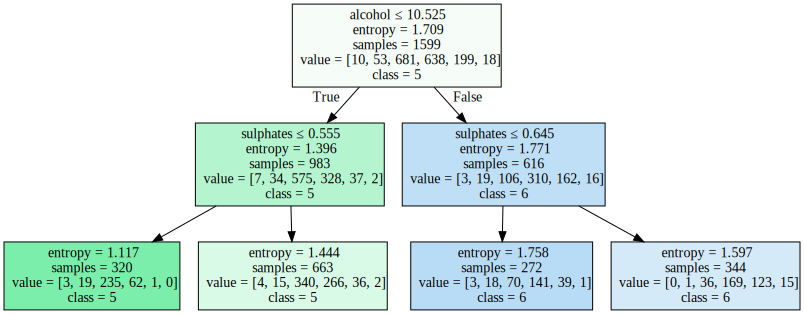

In [18]:
clfWine = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)
clfWine = clfWine.fit(wineDataAttrs, wineDataTarget)
print("node count:", clfWine.tree_.node_count)
dotDataWine = tree.export_graphviz(clfWine, out_file=None,
feature_names=wineDataAttrs.columns,
class_names=['3','4','5','6','7','8'],
filled=True,
rounded=False,
special_characters=True)
graph = graphviz.Source(dotDataWine)
graph

In [19]:
trainY, testY, trainX, testX = model_selection.train_test_split(np.array(wineDataTarget), np.array(wineDataAttrs), test_size=0.2)
clfWine2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clfWine2 = clfWine2.fit(trainX, trainY)
predictions = clfWine2.predict(testX)
print(metrics.accuracy_score(testY, predictions))
print(metrics.classification_report(testY, predictions))

0.60625
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         3
         4.0       1.00      0.09      0.17        11
         5.0       0.66      0.77      0.71       149
         6.0       0.55      0.48      0.51       116
         7.0       0.55      0.57      0.56        40
         8.0       0.00      0.00      0.00         1

   micro avg       0.61      0.61      0.61       320
   macro avg       0.46      0.32      0.32       320
weighted avg       0.61      0.61      0.59       320



/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
